In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()
X = df.data
y = df.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
X.shape

(569, 30)

In [4]:
y.shape

(569,)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
from sklearn.cluster import KMeans
arr =[]

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300, n_init = 10, random_state=0)
    kmeans.fit(X)
    arr.append(kmeans.inertia_)

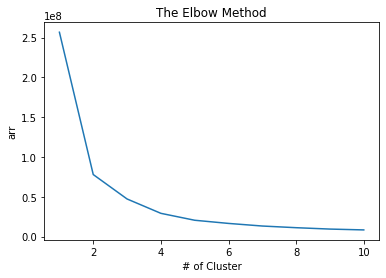

In [7]:
plt.plot(range(1,11),arr)
plt.title("The Elbow Method")
plt.xlabel( "# of Cluster")
plt.ylabel("arr")
plt.show()

In [8]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

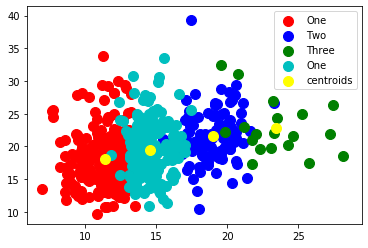

In [9]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100, c="red",label="One")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100, c="blue",label="Two")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100, c="green",label="Three")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100, c="c",label="One")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c = "yellow", label="centroids")
plt.legend()

In [10]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.3143840098608098


In [11]:
# if k = 2
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.3449740051034408


In [12]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                      n_clusters=3)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

In [13]:
pca = PCA(n_components=3).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 150}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [14]:
print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the Agglomerative Clustering solution: 0.5507136914743266
The silhoutte score of the Agglomerative Clustering solution: 0.17389857090826227


The ARI score for the agglomerative clustering approach is 0.61, higher than the one for k-means, which was 0.31. However, the silhouette score of the algorithm is 0.26, which is  lower than that of the k-means which was 0.31.

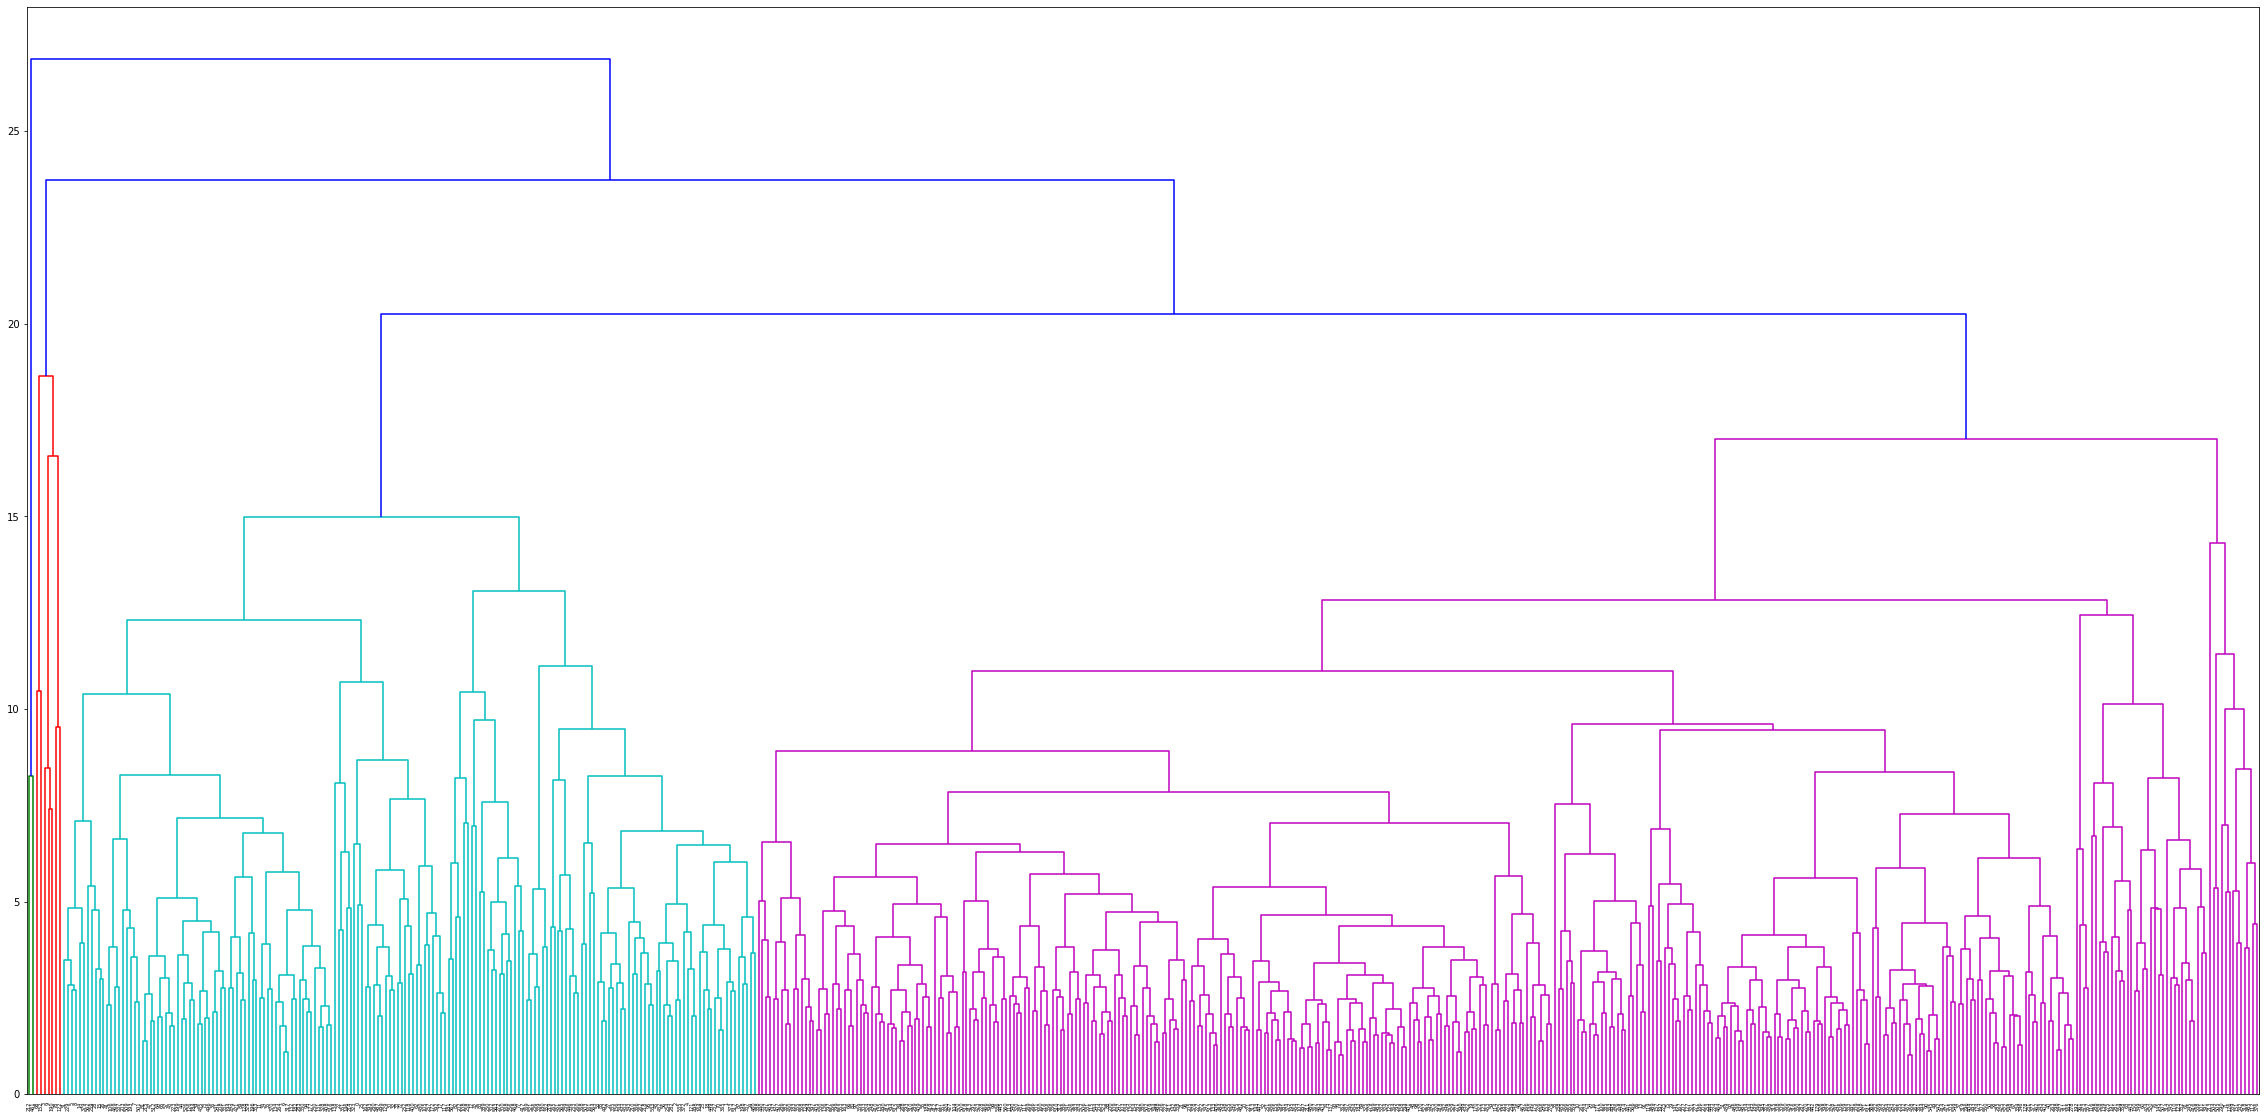

In [15]:
# Below, we sketch the dendrogram using the complete linkage method.
plt.figure(figsize=(40,20))
dendrogram(linkage(X_std, method='complete'))
plt.show()

In [16]:
# DBCSAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [17]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=2, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

In [18]:
pca = PCA(n_components=3).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 150}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [19]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: 0.09635079487159538


In [20]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.19851389887763776


Silhouette score of the DBSCAN solution is higher than those for both k-means and hierarchical clustering

In [21]:
# Gaussian Mixture Models (GMMs)
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [22]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=3, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

In [23]:
pca = PCA(n_components=3).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 100}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [24]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.6096083657006669
The silhoutte score of the GMM solution: 0.2617362642012076


ARI for GMM solution is 0.6 matching Agglomerative Clustering.

In [25]:
# re-labeling
clusters = np.array([2 if x == 1 else 1 if x==0 else 0 for x in clusters])

pd.crosstab(y,clusters)

col_0    0   1    2
row_0              
0      136  65   11
1        1  45  311

In [26]:
#  Only 1 observations seem to be assigned to the wrong cluster.

In [27]:
# soft clustering aspect of the GMM
probs = gmm_cluster.predict_proba(X_std)

size = 65 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(15,8))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [28]:
#t-SNE
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [29]:
X.shape

(569, 30)

In [30]:
y.shape

(569,)

In [31]:
np.random.seed(123)

indices = np.random.choice(1,569)
X = df.data[indices] / 255.0
y = df.target[indices]

#X = df.data
#y = df.target
print(X.shape, y.shape)


(569, 30) (569,)


In [32]:
import time
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 161.198044
[t-SNE] KL divergence after 300 iterations: 4.808866
t-SNE done! Time elapsed: 8.250751972198486 seconds


In [41]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

ValueError: Image size of 201129x86644 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x360 with 1 Axes>

In [37]:
# Digits are reparated well but still have a few overlaps

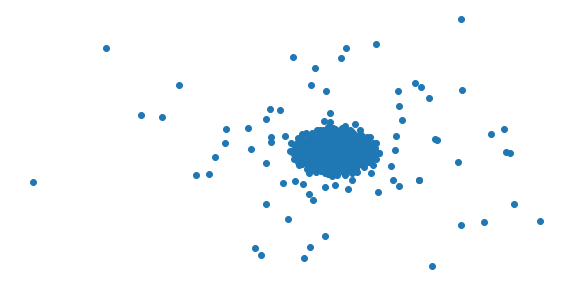

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [36]:
# We can clearly identify two different groupings or rings above.